
Name: Rahmani Dibansa

Date: 23rd of August 2022

Description:
    This contains my output for the homework on lecture 4
Description Edit:
    I misunderstood the homework for lecture 4. I thought I need to use the encoder.
    But I realized that the homework should be like the flower classification in lecture 3
    
Homework Goals:
    - Use the mnist dataset for classification
    - Display the confidence level on the prediction
    - Display the next most likely prediction

Reference(s):
    ACMSIGGRAPH. SIGGRAPH Now | Hands-on Workshop: Machine Learning and Neural Networks – Lecture 4
    Retrieved from: https://www.youtube.com/watch?v=zhwQXbWANkw&list=PLUPhVMQuDB_b2kcOooEduedthcBH53mvC&index=5


In [1]:
# %tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


import cv2


In [2]:
# TAKE THE MNIST DATASET
mnist = tf.keras.datasets.mnist # mnist data of grayscale images of handwritten digits

# LOAD THE DATA, GET THE TRAINING AND TESTING DATA
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load it into training and testing sets


# To understand what is inside the data, I will be printing it
# Please be advised that the describe function will not work on this
# Because we are using the numpy package, and not the pandas
#
# By looking at the data, we can see that it contains an array of
# numbers ranging from 0-255. It is to represent the color of the pixels
""""
print( "\n======================================================================\n" )
print( " The shape of the data: ", x_train.shape)
print(' Training Data(Features): \n', x_train)

print( "\n======================================================================\n" )
print(' Training Data(Ground Truth): \n', y_train)

print( "\n======================================================================\n" )
print(' Testing Data(Features): \n', x_test)

print( "\n======================================================================\n" )
print(' Testing Data(Ground Truth): \n', y_test)
"""

# NORMALIZE THE DATA
# To normalize the data from the image, we divide it by 255.0(the number of pixels)
x_train, x_test = x_train/255.0, x_test/255.0 # the data is in the range (0,255) grayscale value for each pixel, normalize it

In [3]:
# After normalizing the data, it range from 0 - 1.0
# Let's print it
print( "\n======================================================================\n" )
print( " TRAINING DATA (FEATURES) \n")
print( " The shape of the data: ", x_train.shape) # ( number of images, the length of x axis, the height of y axis )
print( " Max value: ", x_train.max())
print( " Min value: ", x_train.min())
print( " Argmax: ", x_train.argmax())
print( " Argmin: ", x_train.argmin())
#print('\n Training Data(Features): \n', x_train)
print( "\n======================================================================\n" )

print( "\n======================================================================\n" )
print( " TESTING DATA (FEATURES) \n")
print( " The shape of the data: ", x_test.shape) # ( number of images, the length of x axis, the height of y axis )
print( " Max value: ", x_test.max())
print( " Min value: ", x_test.min())
print( " Argmax: ", x_test.argmax())
print( " Argmin: ", x_test.argmin())
#print('\n Training Data(Features): \n', x_test)
print( "\n======================================================================\n" )



 TRAINING DATA (FEATURES) 

 The shape of the data:  (60000, 28, 28)
 Max value:  1.0
 Min value:  0.0
 Argmax:  161
 Argmin:  0




 TESTING DATA (FEATURES) 

 The shape of the data:  (10000, 28, 28)
 Max value:  1.0
 Min value:  0.0
 Argmax:  355
 Argmin:  0




In [4]:
print( "\n======================================================================\n" )
print( " TRAINING DATA (GROUND TRUTH) \n")
print( " The shape of the data: ", y_train.shape) # ( number of images, number of x pixels, number of y pixels )
print( " Max value: ", y_train.max())
print( " Min value: ", y_train.min())
print( " Argmax: ", y_train.argmax())
print( " Argmin: ", y_train.argmin())
print( " First 10 elements: ", y_train[:10])
#print('\n Training Data(Features): \n', x_train)
print( "\n======================================================================\n" )

print( "\n======================================================================\n" )
print( " TESTING DATA (GROUND TRUTH) \n")
print( " The shape of the data: ", y_test.shape) # ( number of images, number of x pixels, number of y pixels )
print( " Max value: ", y_test.max())
print( " Min value: ", y_test.min())
print( " Argmax: ", y_test.argmax())
print( " Argmin: ", y_test.argmin())
print( " First 10 elements: ", y_train[:10])
#print('\n Training Data(Features): \n', x_test)
print( "\n======================================================================\n" )

# Additional comments:
# As can be seen from displaying the information related to both data,
# The data for the features has been processed and turned into their
# corresponding value
# However, the data on the ground truth remains to be the ID of the 
# handwritten image from mnist



 TRAINING DATA (GROUND TRUTH) 

 The shape of the data:  (60000,)
 Max value:  9
 Min value:  0
 Argmax:  4
 Argmin:  1
 First 10 elements:  [5 0 4 1 9 2 1 3 1 4]




 TESTING DATA (GROUND TRUTH) 

 The shape of the data:  (10000,)
 Max value:  9
 Min value:  0
 Argmax:  7
 Argmin:  3
 First 10 elements:  [5 0 4 1 9 2 1 3 1 4]




In [5]:
#train model
model = tf.keras.models.Sequential([
        # the input layer                               
        tf.keras.layers.InputLayer((28,28)),
        # flatten it into a single column
        tf.keras.layers.Flatten(), 
        # bottleneck layer
        tf.keras.layers.Dense(32, activation='relu'),
        # the output layer
        tf.keras.layers.Dense(28*28, activation='sigmoid'),
        # the output layer, reshape the flattened column into an image shape
	      tf.keras.layers.Reshape((28, 28, 1))
	  ])

# compile, using the adamax optimizer for gradient descend and mean square error for loss
# The adamax optimizer follows the adamax algorithm
# This is an extension of adam. And is used to have an optimized gradient descent
model.compile(optimizer='adamax', loss='mse')

# fit (train) the model on the test data. The input and the output is the same because
# we are trying to re-construct the original input after compression
train_hist = model.fit(x_train, x_train, epochs=10)     

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 0.0473
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0225
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0160
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0133
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0119
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0113
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0109
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0107
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0106
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0105


In [93]:
# Retrieved from: https://stackoverflow.com/questions/68214855/tensorflow-keras-mnist-get-probabilities-of-prediction


# Additional comments:
#       - If you have an L mode image, that means it is a single channel image - 
#         normally interpreted as greyscale. The L means that is just stores the 
#         Luminance. It is very compact, but only stores a greyscale, not colour.


1/1 [==============================] - 0s 117ms/step


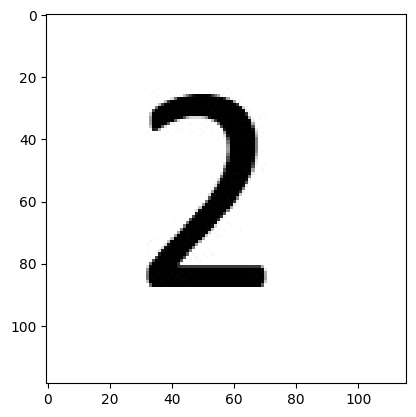

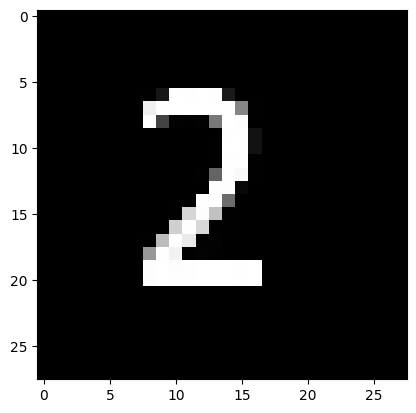

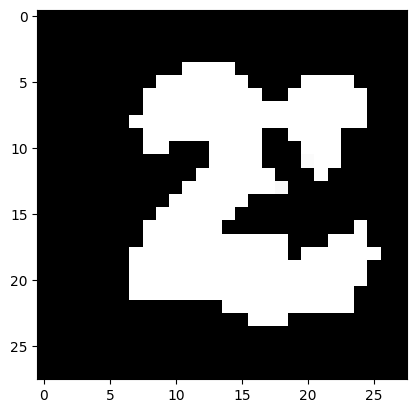

In [11]:
loadImg = cv2.imread("R.jpg", cv2.IMREAD_GRAYSCALE)

# display original image
plt.figure()
plt.imshow(loadImg, cmap="gray")

resizeImg = cv2.resize( loadImg, (28,28) , interpolation= cv2.INTER_LINEAR)
resizeImg = cv2.bitwise_not( resizeImg )

# display processed image
plt.figure()
plt.imshow(resizeImg, cmap="gray")


predictionResult = model.predict(tf.expand_dims(resizeImg, 0))
plt.figure()
plt.imshow(predictionResult.squeeze(), cmap="gray")


# Retrieved from: https://www.geeksforgeeks.org/python-pil-image-open-method/


# Additional comments:
#       - I tried playing with the autoencoder...
#       - I think I misunderstood the homework for lecture 4
